In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy
import plotly
import missingno as msno
from dython.nominal import associations

In [2]:
dataset = pd.read_csv('books_updated.csv', low_memory=False)
authors=pd.read_json('authors.json')
genres=pd.read_json('genres.json')

In [3]:
dataset.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count,currently_reading
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"favorites, currentlyreading, youngadult, ficti...",0.0,35418.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"toread, favorites, fantasy, currentlyreading, ...",287.0,44640.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,240.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"classics, favorites, toread, classic, historic...",50.0,1997.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"classics, favorites, fiction, classic, booksio...",48.0,313.0


In [4]:
authors.head(5)

,id,author_name
0,1,Suzanne Collins
1,2,J.K. Rowling
2,2,Mary GrandPré
3,3,Stephenie Meyer
4,4,Harper Lee


In [5]:
genres.head(5)

,id,genre_name
0,1,youngadult
1,1,fiction
2,1,dystopian
3,1,dystopia
4,1,fantasy


In [6]:
dataset.drop(['book_id','best_book_id','work_id','isbn','original_title',
              'language_code','isbn13','authors','image_url','small_image_url'], axis=1, inplace=True)
#dataset.drop(['book_id','best_book_id','work_id','isbn','original_title','language_code','isbn13','authors','image_url','small_image_url','tag_name'], axis=1, inplace=True)
dataset.head()

,id,books_count,original_publication_year,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_name,toread_count,currently_reading
0,1,272,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0.0,35418.0
1,2,491,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"toread, favorites, fantasy, currentlyreading, ...",287.0,44640.0
2,3,226,2005.0,"Twilight (Twilight, #1)",3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,240.0
3,4,487,1960.0,To Kill a Mockingbird,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"classics, favorites, toread, classic, historic...",50.0,1997.0
4,5,1356,1925.0,The Great Gatsby,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"classics, favorites, fiction, classic, booksio...",48.0,313.0


In [7]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   books_count                10000 non-null  int64  
 2   original_publication_year  9979 non-null   float64
 3   title                      10000 non-null  object 
 4   average_rating             10000 non-null  float64
 5   ratings_count              10000 non-null  int64  
 6   work_ratings_count         10000 non-null  int64  
 7   work_text_reviews_count    10000 non-null  int64  
 8   ratings_1                  10000 non-null  int64  
 9   ratings_2                  10000 non-null  int64  
 10  ratings_3                  10000 non-null  int64  
 11  ratings_4                  10000 non-null  int64  
 12  ratings_5                  10000 non-null  int64  
 13  tag_name                   10000 non-null  obje

In [8]:
dataset.isna().sum()

id                             0
books_count                    0
original_publication_year     21
title                          0
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
tag_name                       0
toread_count                   0
currently_reading            224
dtype: int64

In [9]:
dataset.dropna(subset=['original_publication_year', 'currently_reading'], axis=0, inplace=True)
dataset.isna().sum()

id                           0
books_count                  0
original_publication_year    0
title                        0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
tag_name                     0
toread_count                 0
currently_reading            0
dtype: int64

In [10]:
dataset.duplicated().sum()

0

In [11]:
dataset['title'].duplicated().sum()

35

In [12]:
dataset.drop_duplicates('title', keep = 'first', inplace=True)
dataset['title'].duplicated().sum()

0

In [13]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9720 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9720 non-null   int64  
 1   books_count                9720 non-null   int64  
 2   original_publication_year  9720 non-null   float64
 3   title                      9720 non-null   object 
 4   average_rating             9720 non-null   float64
 5   ratings_count              9720 non-null   int64  
 6   work_ratings_count         9720 non-null   int64  
 7   work_text_reviews_count    9720 non-null   int64  
 8   ratings_1                  9720 non-null   int64  
 9   ratings_2                  9720 non-null   int64  
 10  ratings_3                  9720 non-null   int64  
 11  ratings_4                  9720 non-null   int64  
 12  ratings_5                  9720 non-null   int64  
 13  tag_name                   9720 non-null   objec

In [14]:
for col in ['original_publication_year', 'toread_count', 'currently_reading']:
    dataset[col] = dataset[col].astype(int)
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9720 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9720 non-null   int64  
 1   books_count                9720 non-null   int64  
 2   original_publication_year  9720 non-null   int32  
 3   title                      9720 non-null   object 
 4   average_rating             9720 non-null   float64
 5   ratings_count              9720 non-null   int64  
 6   work_ratings_count         9720 non-null   int64  
 7   work_text_reviews_count    9720 non-null   int64  
 8   ratings_1                  9720 non-null   int64  
 9   ratings_2                  9720 non-null   int64  
 10  ratings_3                  9720 non-null   int64  
 11  ratings_4                  9720 non-null   int64  
 12  ratings_5                  9720 non-null   int64  
 13  tag_name                   9720 non-null   objec

In [15]:
dataset.head()

,id,books_count,original_publication_year,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_name,toread_count,currently_reading
0,1,272,2008,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0,35418
1,2,491,1997,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"toread, favorites, fantasy, currentlyreading, ...",287,44640
2,3,226,2005,"Twilight (Twilight, #1)",3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"youngadult, fantasy, favorites, vampires, ya, ...",0,240
3,4,487,1960,To Kill a Mockingbird,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"classics, favorites, toread, classic, historic...",50,1997
4,5,1356,1925,The Great Gatsby,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"classics, favorites, fiction, classic, booksio...",48,313


In [16]:
authors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13216 entries, 0 to 13215
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           13216 non-null  int64 
 1   author_name  13216 non-null  object
dtypes: int64(1), object(1)
memory usage: 1023.8 KB


In [17]:
authors.isna().sum()

id             0
author_name    0
dtype: int64

In [18]:
authors.duplicated().sum()

7

In [19]:
dataset.drop_duplicates( keep = 'first', inplace=True)
dataset['title'].duplicated().sum()

0

In [20]:
authors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13216 entries, 0 to 13215
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           13216 non-null  int64 
 1   author_name  13216 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0 MB


In [21]:
genres.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120837 entries, 0 to 120836
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          120837 non-null  int64 
 1   genre_name  120837 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.6 MB


In [22]:
genres.isna().sum()

id            0
genre_name    0
dtype: int64

In [23]:
genres.duplicated().sum()

0

In [24]:
genres.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120837 entries, 0 to 120836
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          120837 non-null  int64 
 1   genre_name  120837 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.6 MB


In [25]:
genresframe=pd.merge( genres, dataset, left_on="id",right_on="id", how="left",validate="m:1")
genresframe.dropna(subset=['title'], axis=0, inplace=True)
fictiononly = genresframe[genresframe['tag_name'].str.contains("fiction")]

In [26]:
countedgenres=fictiononly.groupby("genre_name").count()['id']
countedgenresres = countedgenres.sort_values(ascending=False)

# Количество книг в жанре(теге)

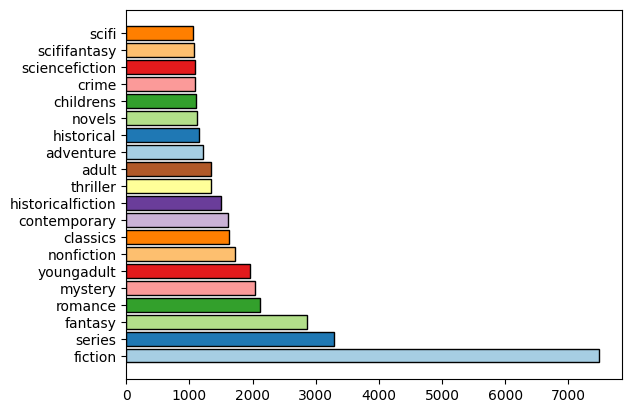

In [27]:
height = countedgenresres[:20].values
bars = countedgenresres[:20].index
y_pos = np.arange(len(bars))

# Create bars with different colors
plt.barh(y_pos, height, color=plt.get_cmap('Paired').colors, edgecolor='k', linewidth=1)

# Create names on the x-axis
plt.yticks(y_pos, bars)

# Show graph
plt.show()

# Количество книг в жанре(теге) (По фантастике)

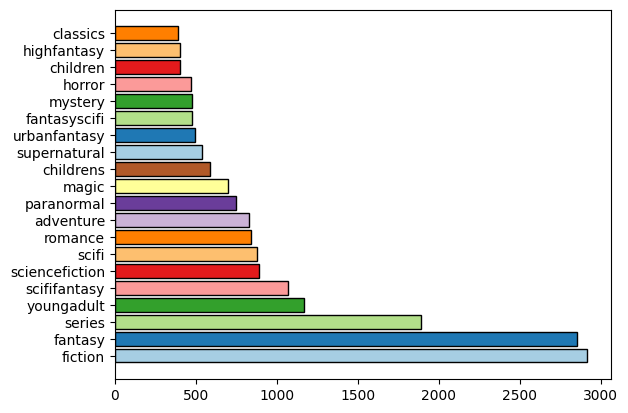

In [28]:
fantasyonly = fictiononly[fictiononly['tag_name'].str.contains("fantasy")]
countedgenresfan=fantasyonly.groupby("genre_name").count()['id']
countedgenresfan = countedgenresfan.sort_values(ascending=False)
height = countedgenresfan[:20].values
bars = countedgenresfan[:20].index
y_pos = np.arange(len(bars))

# Create bars with different colors
plt.barh(y_pos, height, color=plt.get_cmap('Paired').colors, edgecolor='k', linewidth=1)

# Create names on the x-axis
plt.yticks(y_pos, bars)

# Show graph
plt.show()

# Сравнение книг по оценке

In [29]:
datasetreviews = dataset[dataset['ratings_count']  >= 100000]
booksmore45  = datasetreviews[datasetreviews['average_rating']  >= 4.25].count()['id']
booksless45= datasetreviews[datasetreviews['average_rating']  < 4.25].count()['id']

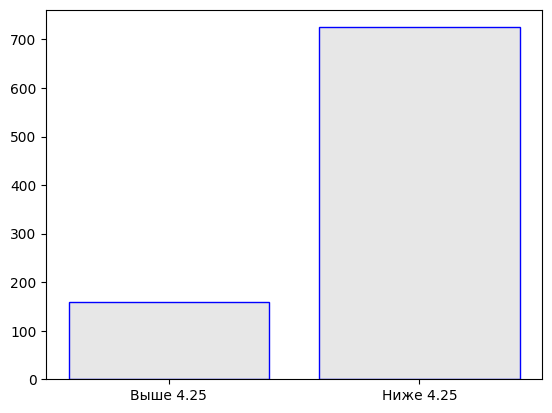

In [30]:
height = [booksmore45,booksless45]
bars = ('Выше 4.25', 'Ниже 4.25')
y_pos = np.arange(len(bars))

# Create bars with blue edge color
plt.bar(y_pos, height, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graph
plt.show()

# Сравнение книг в декадах 21 века

In [31]:
booksafter2000  = dataset[dataset['original_publication_year']  >= 2010].count()['id']
booksafter1900= dataset[dataset['original_publication_year']  >= 2000]
booksbefore2000 = booksafter1900[booksafter1900['original_publication_year']  < 2010  ].count()['id']

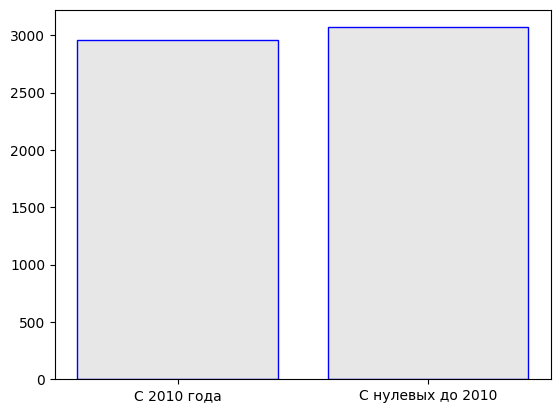

In [32]:
height = [booksafter2000,booksbefore2000]
bars = ('С 2010 года', 'C нулевых до 2010')
y_pos = np.arange(len(bars))

# Create bars with blue edge color
plt.bar(y_pos, height, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graph
plt.show()

# Распределние книг по годам в датасете, начиная с 0 г нашей эры

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19012\1538560936.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


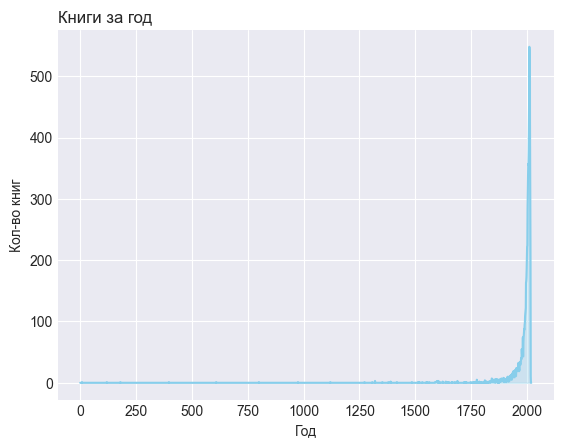

In [33]:
x=range(0,2020)

y=[dataset[dataset['original_publication_year']  == year].count()['id'] for year in x]

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Make the same graph
plt.fill_between( x, y, color="skyblue", alpha=0.3)
plt.plot(x, y, color="skyblue")
 
# Add titles
plt.title("Книги за год ", loc="left")
plt.xlabel("Год")
plt.ylabel("Кол-во книг")
# Show the graph
plt.show()

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19012\1302353857.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


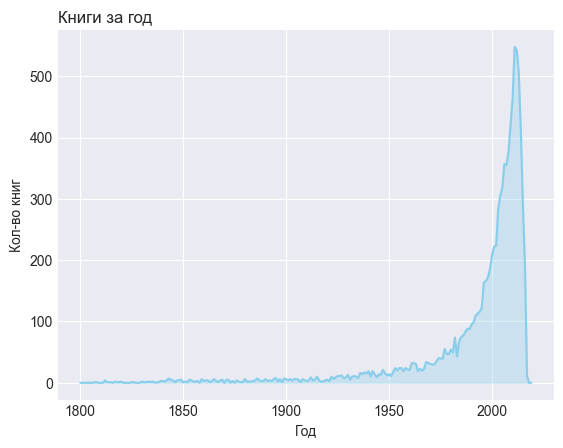

In [34]:
x=range(1800,2020)

y=[dataset[dataset['original_publication_year']  == year].count()['id'] for year in x]

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Make the same graph
plt.fill_between( x, y, color="skyblue", alpha=0.3)
plt.plot(x, y, color="skyblue")
 
# Add titles
plt.title("Книги за год ", loc="left")
plt.xlabel("Год")
plt.ylabel("Кол-во книг")
# Show the graph
plt.show()

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19012\304865896.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


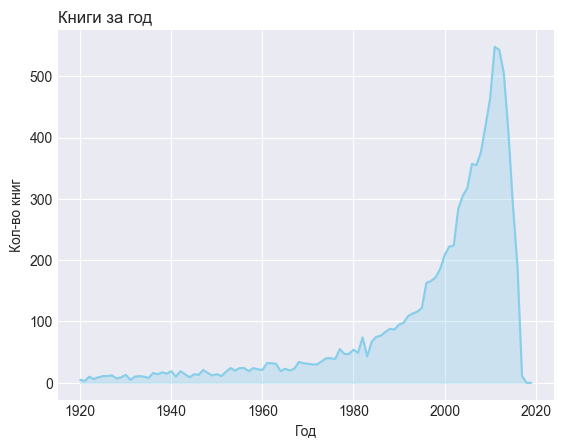

In [35]:
x=range(1920,2020)

y=[dataset[dataset['original_publication_year']  == year].count()['id'] for year in x]

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Make the same graph
plt.fill_between( x, y, color="skyblue", alpha=0.3)
plt.plot(x, y, color="skyblue")
 
# Add titles
plt.title("Книги за год ", loc="left")
plt.xlabel("Год")
plt.ylabel("Кол-во книг")

# Show the graph
plt.show()

In [36]:
newgenresframe=pd.merge( genres, dataset, left_on="id",right_on="id", how="left",validate="m:1")
genrescounted100=newgenresframe.groupby(by="genre_name", group_keys=True).agg({
    'average_rating':'mean',
    'id':'count'
})
filtered100genres= genrescounted100[genrescounted100['id']>=100]
resfiltered100genres= filtered100genres.sort_values(by='average_rating',ascending=False)
resfiltered100genres

,average_rating,id
genre_name,,
manga,4.273509,115
comics,4.227100,375
graphicnovels,4.221849,443
picturebooks,4.214949,301
demons,4.212308,105
...,...,...
generalfiction,3.815993,288
literaryfiction,3.813094,510
adultfiction,3.796239,839


# Распределение средних оценок по количеству книг в жанре

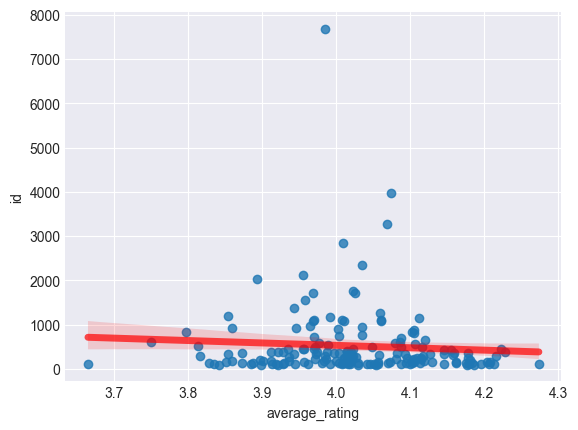

In [37]:
# plot
sns.regplot(x=resfiltered100genres["average_rating"], y=resfiltered100genres["id"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In [38]:
filtered100genres2= resfiltered100genres[resfiltered100genres['id']<=1500]

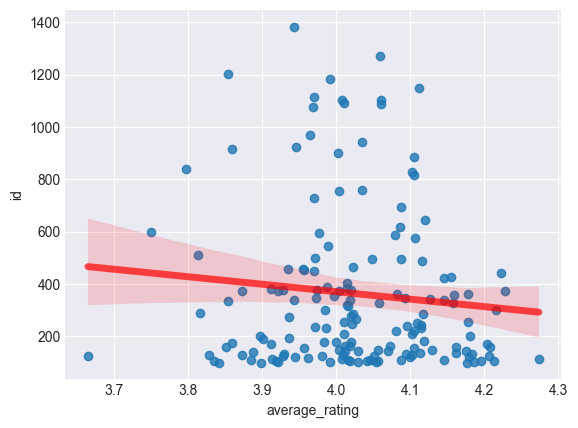

In [39]:
# plot
sns.regplot(x=filtered100genres2["average_rating"], y=filtered100genres2["id"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In [40]:
authorsframe=pd.merge( authors, dataset, left_on="id",right_on="id", how="left",validate="m:1")
authorsframe=authorsframe.groupby(by="author_name", group_keys=True).agg({
    'average_rating':'mean',
    'id':'count'
})
# authorsframe= authorsframe[authorsframe['id']>=1]
authorsres= authorsframe.sort_values(by='average_rating',ascending=False)
authorsres

,average_rating,id
author_name,,
Lane T. Dennis,4.760000,1
Bill Watterson,4.703077,13
Ronald A. Beers,4.670000,2
Lee Loughridge,4.650000,1
Steve Oliff,4.650000,1
...,...,...
Winslow Pinn,NaN,1
Winslow Pinney Pels,NaN,1
Şerif Yeşilbucak,NaN,1


# Распредление средних оценок по авторам в зависимости от количества выпущенных книг

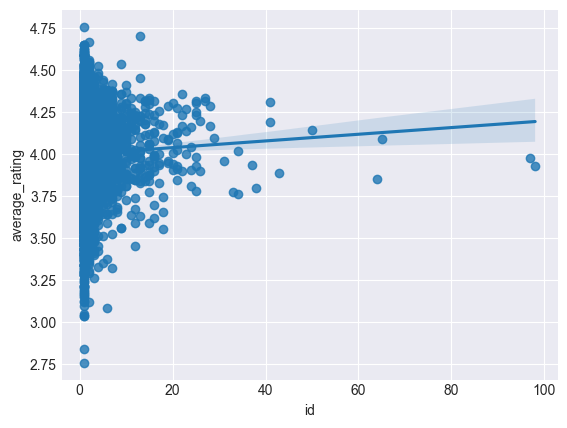

In [41]:
sns.regplot(y=authorsres["average_rating"], x=authorsres["id"])
plt.show()

# 3 гипотеза качество книг за последнее десятиление в среднем упало по сравнению с предыдущим

In [42]:
def yearcheck(x):
    global decade
    if x >= 2010 :
        decade = "newer"
    elif x>=2000 and x<2010:
        decade = "older"
    else: decade = "skip"
    return decade
bookdecade = dataset
bookdecade['decade'] = bookdecade['original_publication_year'].apply(lambda x :yearcheck(x))

In [43]:
groupdecade = bookdecade.groupby(['decade'])["average_rating"].mean()

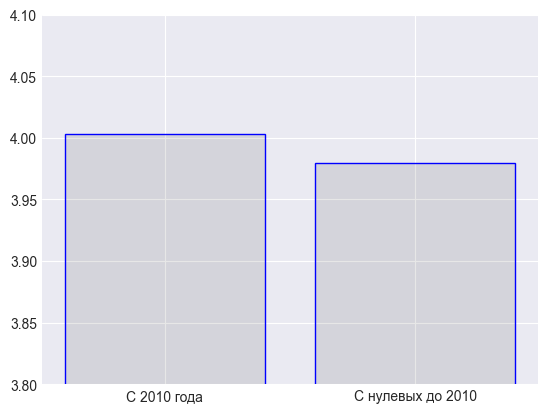

In [44]:
height = groupdecade[:2].values
bars = ('С 2010 года', 'C нулевых до 2010')
y_pos = np.arange(len(bars))

plt.ylim(3.8,4.1)
# Create bars with blue edge color
plt.bar(y_pos, height, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graph
plt.show()

In [45]:
yearstat = dataset[dataset['original_publication_year']  >= 2000]
yearstat = yearstat[yearstat['original_publication_year']  < 2020]
yearstat = yearstat.groupby("original_publication_year").count()['id']
yearstat

original_publication_year
2000    208
2001    222
2002    224
2003    284
2004    305
2005    318
2006    357
2007    355
2008    377
2009    420
2010    464
2011    548
2012    543
2013    505
2014    410
2015    289
2016    190
2017     11
Name: id, dtype: int64

# Распредление книг по годам

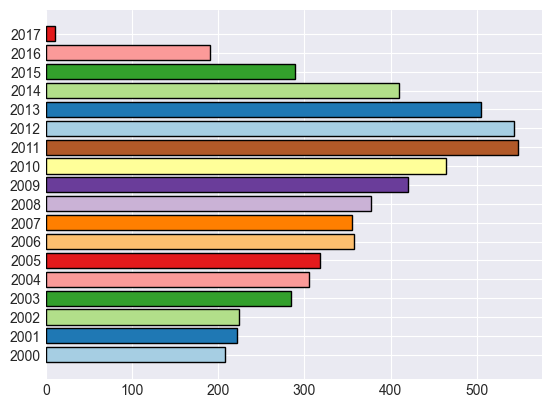

In [46]:
height = yearstat.values
bars = yearstat.index
y_pos = np.arange(len(bars))


# Create bars with blue edge color
plt.barh(y_pos, height, color=plt.get_cmap('Paired').colors, edgecolor='k', linewidth=1)

# Create names on the x-axis
plt.yticks(y_pos, bars)

# Show graph
plt.show()


# Распределение количетсва читающих от среднего рейтинга книги

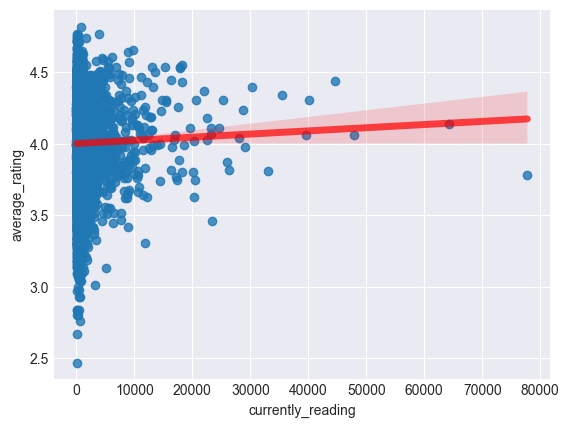

In [47]:
sns.regplot(x=dataset["currently_reading"], y=dataset["average_rating"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In [48]:
whole=pd.merge( genres, dataset, left_on="id",right_on="id", how="inner",validate="m:m")
whole=pd.merge( authors, whole, left_on="id",right_on="id", how="inner",validate="m:m")
whole


,id,author_name,genre_name,books_count,original_publication_year,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_name,toread_count,currently_reading,decade
0,1,Suzanne Collins,youngadult,272,2008,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0,35418,older
1,1,Suzanne Collins,fiction,272,2008,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0,35418,older
2,1,Suzanne Collins,dystopian,272,2008,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0,35418,older
3,1,Suzanne Collins,dystopia,272,2008,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0,35418,older
4,1,Suzanne Collins,fantasy,272,2008,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0,35418,older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155704,10000,John Keegan,europeanhistory,31,1998,The First World War,4.00,9162,9700,364,117,345,2031,4138,3069,"toread, history, nonfiction, currentlyreading,...",44,260,skip
155705,10000,John Keegan,hist,31,1998,The First World War,4.00,9162,9700,364,117,345,2031,4138,3069,"toread, history, nonfiction, currentlyreading,...",44,260,skip
155706,10000,John Keegan,worldhistory,31,1998,The First World War,4.00,9162,9700,364,117,345,2031,4138,3069,"toread, history, nonfiction, currentlyreading,...",44,260,skip
155707,10000,John Keegan,worldwarone,31,1998,The First World War,4.00,9162,9700,364,117,345,2031,4138,3069,"toread, history, nonfiction, currentlyreading,...",44,260,skip


In [49]:
whole['author_name']=whole['author_name'].astype('string')
whole['genre_name']=whole['genre_name'].astype('string')
whole['original_publication_year']=whole['original_publication_year'].astype('int32')
whole['ratings_count']=whole['ratings_count'].astype('int32')
whole['work_ratings_count']=whole['work_ratings_count'].astype('int32')
whole['work_text_reviews_count']=whole['work_text_reviews_count'].astype('int32')
whole['ratings_1']=whole['ratings_1'].astype('int32')
whole['ratings_2']=whole['ratings_2'].astype('int32')
whole['ratings_3']=whole['ratings_3'].astype('int32')
whole['ratings_4']=whole['ratings_4'].astype('int32')
whole['ratings_5']=whole['ratings_5'].astype('int32')
whole['books_count']=whole['books_count'].astype('int32')
whole['id']=whole['id'].astype('int32')

whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155709 entries, 0 to 155708
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         155709 non-null  int32  
 1   author_name                155709 non-null  string 
 2   genre_name                 155709 non-null  string 
 3   books_count                155709 non-null  int32  
 4   original_publication_year  155709 non-null  int32  
 5   title                      155709 non-null  object 
 6   average_rating             155709 non-null  float64
 7   ratings_count              155709 non-null  int32  
 8   work_ratings_count         155709 non-null  int32  
 9   work_text_reviews_count    155709 non-null  int32  
 10  ratings_1                  155709 non-null  int32  
 11  ratings_2                  155709 non-null  int32  
 12  ratings_3                  155709 non-null  int32  
 13  ratings_4                  15

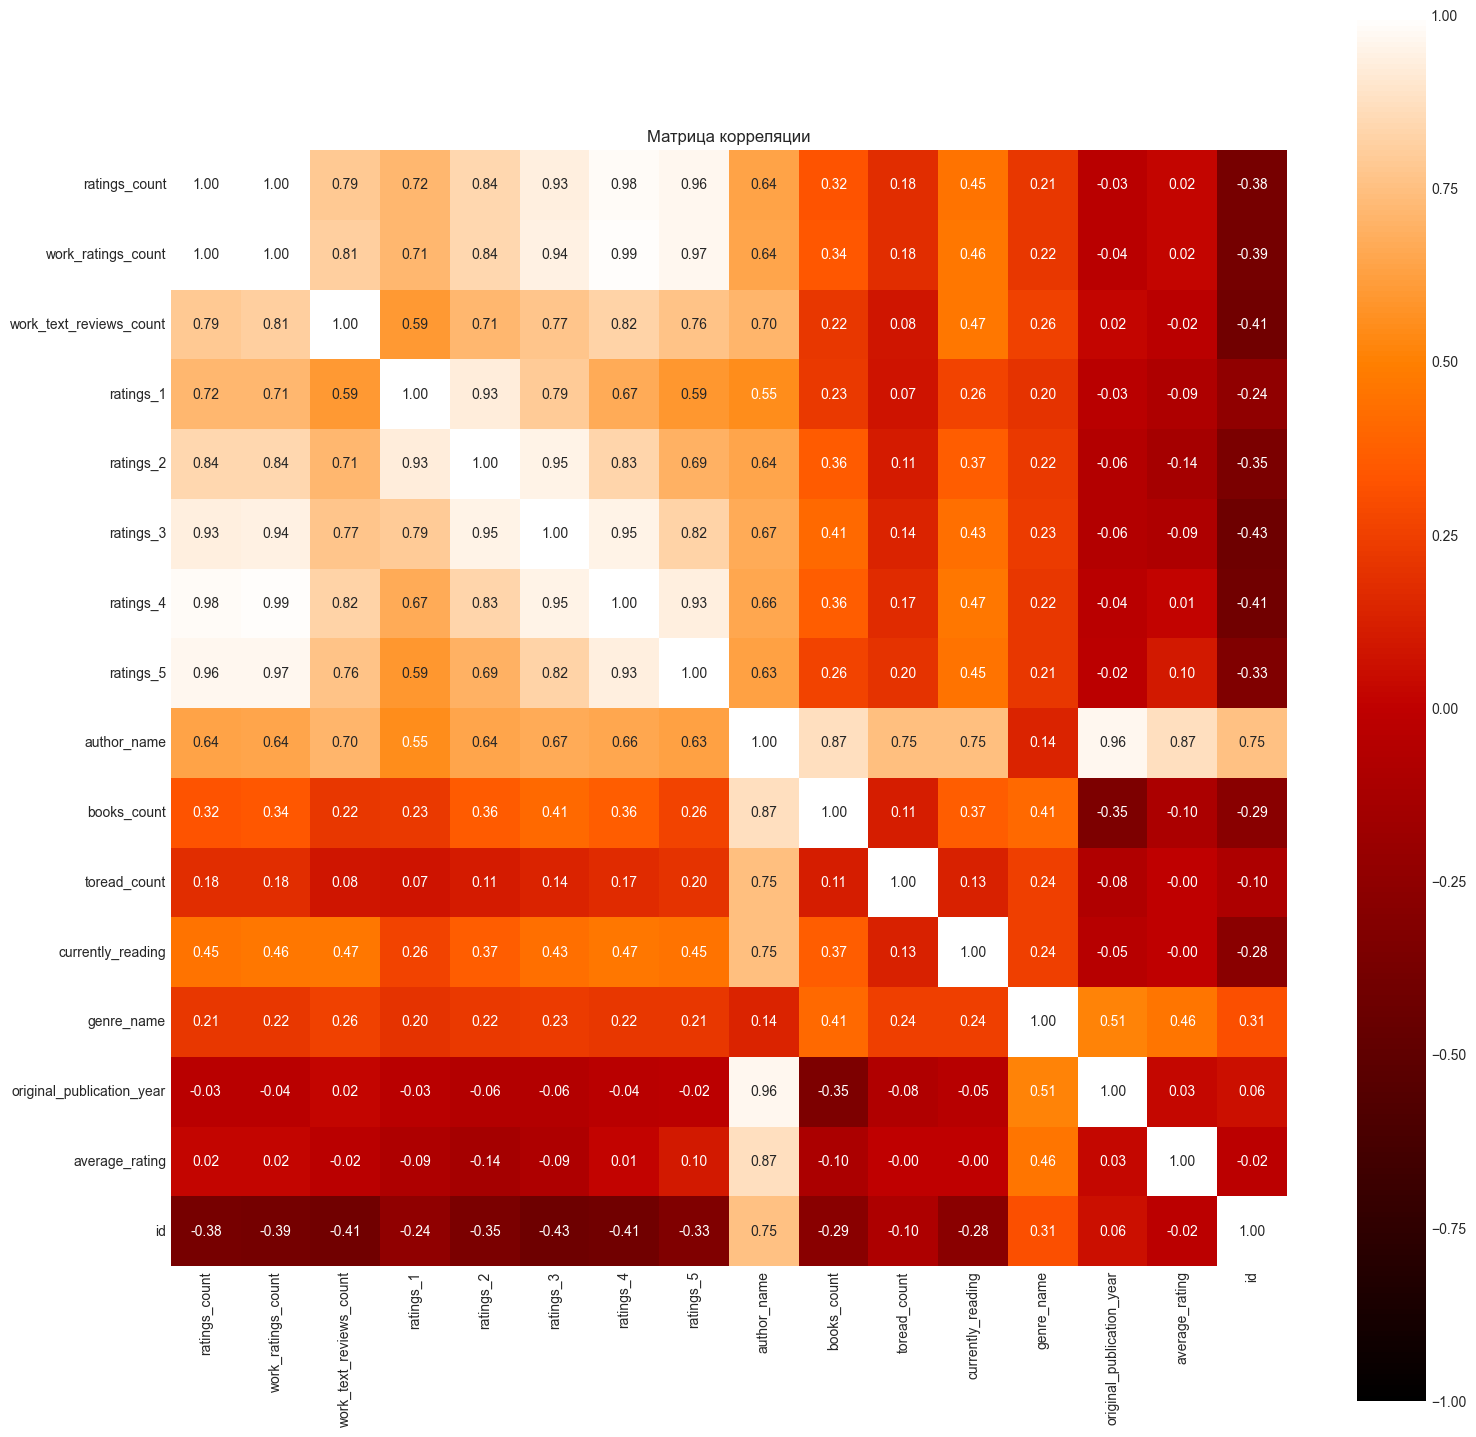

In [50]:
datasetcor = whole
datasetcor.drop(['tag_name', 'title','decade'], axis=1, inplace=True)
categorical_columns=['author_name','genre_name']
corr_res=associations(datasetcor, nominal_columns=categorical_columns, cmap='gist_heat', title='Матрица корреляции', 
                      clustering = True, figsize=(18,18), plot=False)